#### HW1 Problem 2

#### Note:
* lam = -1: complex eigenvalue
* lam = 0: largest eigenvalue < 1, stable
* lam = 1: largest eigenvalue > 1, unstable

In [1]:
import sympy as sm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x, y = sm.symbols('x, y')

lam = 1
rhs1 = y - 0.5 * x + 5
rhs2 = 0.6 * y + lam * x + 5

#### Equilibria

In [3]:
# equating RIGHT hand side to LEFT hand side
eqn1 = sm.Eq(rhs1, x)
eqn2 = sm.Eq(rhs2, y)

# compute fixed points
equilibria = sm.solve((eqn1, eqn2), x, y)
print(equilibria)

{x: -17.5000000000000, y: -31.2500000000000}


#### Jacobian

In [4]:
eqMat = sm.Matrix([rhs1, rhs2]) # rate
Mat = sm.Matrix([x, y])
jacMat = eqMat.jacobian(Mat) # differetiate with respect to Mat

jacMat

Matrix([
[-0.5,   1],
[   1, 0.6]])

#### Eigenvalues

In [5]:
for eigenval in list(jacMat.eigenvals().keys()):
    try:
        print(float(eigenval))
    except:
        print("complex:", eigenval)

-1.0912712210513327
1.1912712210513328


#### Simulating Path

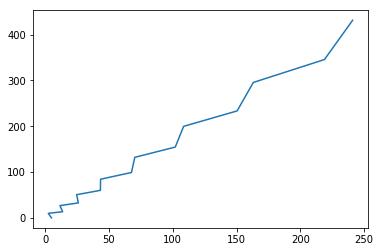

In [6]:
x_, y_ = 5, 0
xs, ys = [x_], [y_]

for i in range(15):
    x_, y_ = rhs1.subs([(x, x_), (y, y_)]), rhs2.subs([(x, x_), (y, y_)])
    xs.append(x_)
    ys.append(y_)

plt.plot(xs, ys)
plt.show()